In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Problem Statement:

In [2]:
# ensure:
# that the applicants capable of repaying the loan are not rejected.
# If the applicant is likely to repay the loan, then not approving the
# loan results in a loss of business to the company.
# If the applicant is not likely to repay the loan, i.e. he/she is likely to default,
# then approving the loan may lead to a financial loss for the company.

# the company wants to understand the driving factors (or driver variables) behind loan default,
# i.e. the variables which are strong indicators of default

In [3]:
#loading the required datasets for our analysis ; 
df1 = pd.read_csv("application_data.csv")
df2 = pd.read_csv("previous_application.csv")


In [4]:
print(df1.shape)
print(df2.shape)

(307511, 122)
(1670214, 37)


#### Dropping unnecessary columns based on null value percentages:

In [5]:
df1.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#checking for missing values:
df1.isnull().sum()/len(df1.SK_ID_CURR)
column_list = []
for i in df1.columns:
    if (df1[i].isnull().sum())/len(df1.SK_ID_CURR) >= 0.50:
        column_list.append(i)
print(column_list)
    

['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE']


In [7]:
df1["OWN_CAR_AGE"].isnull().sum()/len(df1.SK_ID_CURR)

0.6599081008484249

In [8]:
#while looking at our column_list variable that contains all those columns we see, it has very high null
# value percentages.
# we will drop these columns from our dataset.

df1.drop(columns=column_list,axis = 1,inplace = True)

In [9]:
df1.shape

(307511, 81)

In [10]:
df1.isnull().sum()/len(df1.SK_ID_CURR)
column_list_1 = []
for i in df1.columns:
    if (df1[i].isnull().sum())/len(df1.SK_ID_CURR) >= 0.25:
        column_list_1.append(i)
print(column_list_1)

['OCCUPATION_TYPE', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE', 'EMERGENCYSTATE_MODE']


In [11]:
drop_cols = ['YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MODE',
             'FLOORSMAX_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_MEDI', 'TOTALAREA_MODE',
             'EMERGENCYSTATE_MODE']
# dropping some more unnecessary columns:
df1.drop(columns = drop_cols,axis = 1,inplace =True)

In [12]:
df1.shape

(307511, 73)

In [13]:
pd.set_option("display.max_column",73)

In [14]:
# so in total we have dropped (122-73) columns as they were deemed unneccessary for our analysis.

#### EDA 

In [15]:
# we will analyse our target variable as against our entire dataset. What it means is we will
# first explore patterns of our variables in our entire dataset and then we can put it against 
# our target variable.

In [16]:
df1.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### Target Distribution:

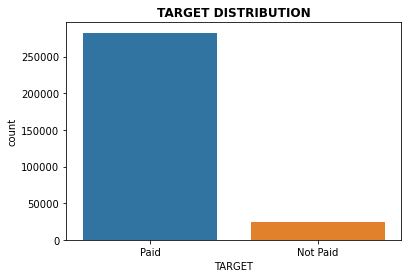

In [17]:
ax = sns.countplot(x = "TARGET", data = df1)
plt.title("TARGET DISTRIBUTION",size=12,fontweight = "bold")
ax.set_xticklabels(labels = ["Paid","Not Paid"])
plt.show()

#The data seems highly imbalanced as most applicants have either repaid or not defaulted on any installment
# payments.

###### Contract_type :-

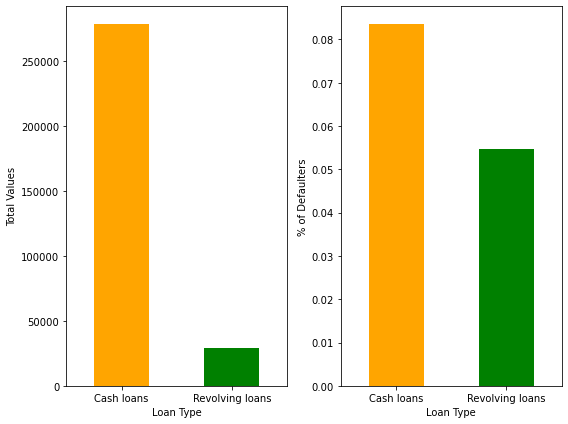

In [18]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (8,6))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
df1.NAME_CONTRACT_TYPE.value_counts().plot.bar(ax = ax1,color = ["orange","green"])
ax1.set_xticklabels(labels = ["Cash loans","Revolving loans"],rotation= 0)
df1.groupby("NAME_CONTRACT_TYPE")["TARGET"].mean().plot.bar(ax = ax2,color= ["orange","green"])
ax2.set_xticklabels(labels = ["Cash loans","Revolving loans"],rotation= 0)
ax1.set_xlabel("Loan Type")
ax1.set_ylabel("Total Values")
ax2.set_xlabel("Loan Type")
ax2.set_ylabel("% of Defaulters")
plt.tight_layout()
plt.show()

## insight : We can clearly see that cash loans is the preferred loan type among customers.
#            The prevalence of unpaid payments among revolving loan contracts is high considering
#            they account for only 10% of all loan contracts.

In [19]:
df1.NAME_CONTRACT_TYPE.value_counts(normalize = True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

###### GENDER :-

In [20]:
df1.CODE_GENDER.value_counts()
# treating missing values first:
df1.loc[df1["CODE_GENDER"]=="XNA"]
# there is no other way of determining the gender 'XNA'. Therefor we replace it with mode since its a 
# categorical variable.
df1.CODE_GENDER.replace('XNA',"F",inplace = True)

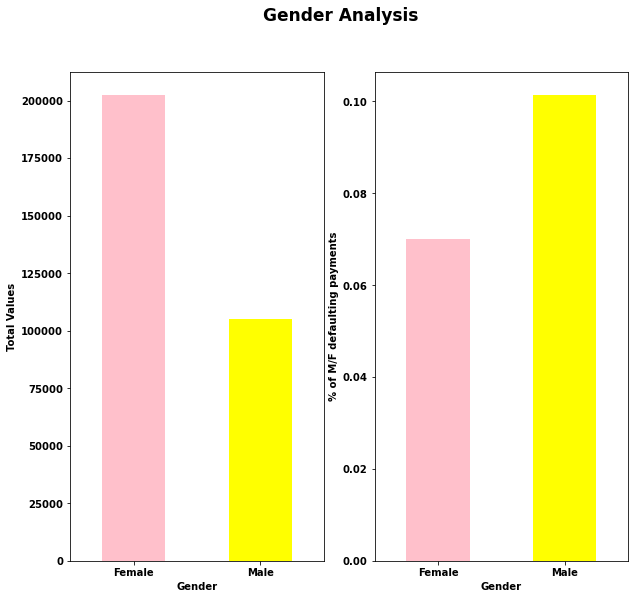

In [21]:

fig,(ax1,ax2) = plt.subplots(1,2,figsize = (10,9))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.suptitle("Gender Analysis",fontweight = 'bold',size= 17)

df1.CODE_GENDER.value_counts().plot.bar(ax = ax1,color = ["pink","yellow"])
ax1.set_xticklabels(labels = ["Female","Male"],rotation= 0)
df1.groupby("CODE_GENDER")["TARGET"].mean().plot.bar(ax = ax2,color= ["pink","yellow"])
ax2.set_xticklabels(labels = ["Female","Male"],rotation= 0)
ax1.set_xlabel("Gender")
ax1.set_ylabel("Total Values")
ax2.set_xlabel("Gender")
ax2.set_ylabel("% of M/F defaulting payments")
plt.show()

# ## Insight : We can see that male to female ratio in applying for loans tilts towards the female.This 
# can be attributed to the changes that we made in our dataframe where we replaced all unacceptable
# values with mode value(Female).

# The proportion of male(almost 10%) defaulting on payments is higher considering their ratios while applying.

###### Own Car :-

In [22]:
df1.FLAG_OWN_CAR.isnull().sum()

0

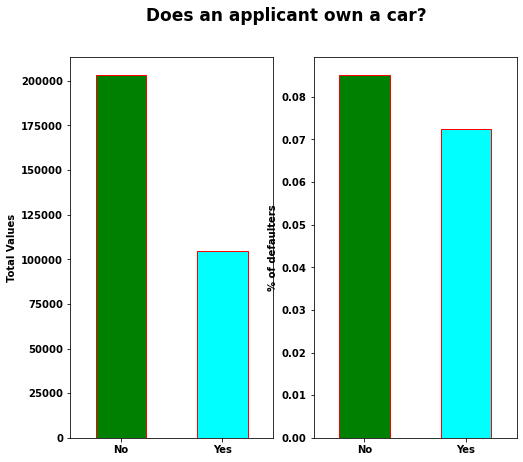

In [23]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (8,7))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.suptitle("Does an applicant own a car?",fontweight = 'bold',size= 17)

df1.FLAG_OWN_CAR.value_counts().plot.bar(ax = ax1,color = ["green","cyan"],
                                         edgecolor = ["red","red"])
ax1.set_xticklabels(labels = ["No","Yes"],rotation= 0)
df1.groupby("FLAG_OWN_CAR")["TARGET"].mean().plot.bar(ax = ax2,color= ["green","cyan"],edgecolor
                                                      = ["red","red"])
ax2.set_xticklabels(labels = ["No","Yes"],rotation= 0)
ax1.set_ylabel("Total Values")
ax2.set_xlabel("")
ax2.set_ylabel("% of defaulters")
plt.show()

# Most of the applicants(65%) do not own the car.
# It is surprising to know applicants that can afford a car and default on their payments is very similar
# to those who do not own a car and  default on their loan payments.

In [24]:
df1.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [25]:
df1.groupby("FLAG_OWN_CAR")["TARGET"].mean()

FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64

###### Own Realty:

In [26]:
df1.FLAG_OWN_REALTY.isnull().sum()

0

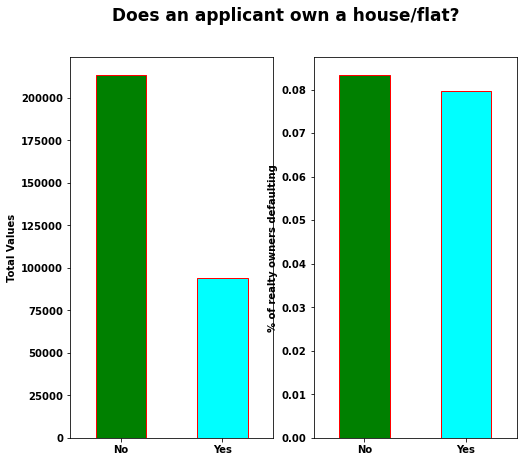

In [27]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (8,7))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.suptitle("Does an applicant own a house/flat?",fontweight = 'bold',size= 17)

df1.FLAG_OWN_REALTY.value_counts().plot.bar(ax = ax1,color = ["green","cyan"],
                                         edgecolor = ["red","red"])
ax1.set_xticklabels(labels = ["No","Yes"],rotation= 0)
df1.groupby("FLAG_OWN_REALTY")["TARGET"].mean().plot.bar(ax = ax2,color= ["green","cyan"],edgecolor
                                                      = ["red","red"])
ax2.set_xticklabels(labels = ["No","Yes"],rotation= 0)
ax1.set_ylabel("Total Values")
ax2.set_xlabel("")
ax2.set_ylabel("% of realty owners defaulting")
plt.show()


# Insight:  The % of applicants that own a realty is almost half.
#           It is surprising to know applicants that can afford a house and default on their payments is very similar
# to those who do not own a house and default on their loan payments.

In [28]:
print(df1.FLAG_OWN_CAR.value_counts(normalize = True),
      df1.groupby("FLAG_OWN_CAR")["TARGET"].mean())

N    0.659892
Y    0.340108
Name: FLAG_OWN_CAR, dtype: float64 FLAG_OWN_CAR
N    0.085002
Y    0.072437
Name: TARGET, dtype: float64


###### Housing Type:

In [29]:
df1.NAME_HOUSING_TYPE.isnull().sum()

0

<Figure size 720x864 with 0 Axes>

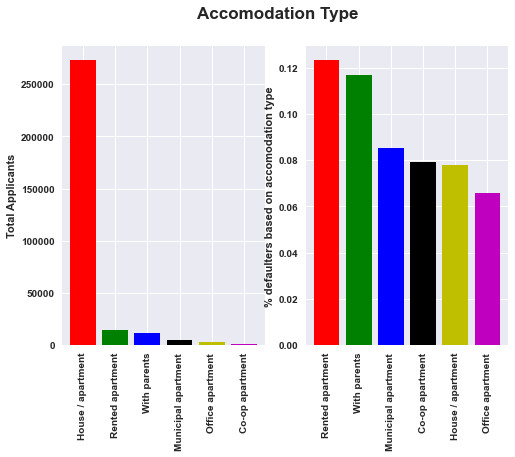

In [30]:
plt.style.use("seaborn")
plt.figure(figsize=(10,12))
fig,(ax1,ax2) = plt.subplots(1,2)
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.suptitle("Accomodation Type",fontweight = 'bold',size= 17)
label = ['House / apartment',
 'Rented apartment',
 'With parents',
 'Municipal apartment',
 'Office apartment',
 'Co-op apartment']
colors = list("rgbkym")

df1.NAME_HOUSING_TYPE.value_counts().plot.bar(ax = ax1,width = 0.8,color = colors)
ax1.set_xticklabels(labels = label,rotation= 90)
df1.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().sort_values(ascending = False).plot.bar(width=0.8,
    ax = ax2,color= colors)

ax1.tick_params(axis = "x",top = False,labeltop = False)
ax2.set(xlabel = None)
ax1.set_ylabel("Total Applicants")

ax2.tick_params(axis = "x",top = False,labeltop = False)
ax2.set_ylabel("% defaulters based on accomodation type")
plt.show()


# Most applicants stay in a house/apartment.
# The proportion of applicants residing in any other accomodation type is insignificant in comparison to
# those who reside in house/apartment and the rate of default for such applicants is almost 8%.

# Almost 12% of applicants who either stay in rented apartments or with their parents default on their
# loan commitments which is on the higher side considering the proportion of such applicants.

In [31]:
df1.groupby("NAME_HOUSING_TYPE")["TARGET"].mean().sort_values(ascending = False)

NAME_HOUSING_TYPE
Rented apartment       0.123131
With parents           0.116981
Municipal apartment    0.085397
Co-op apartment        0.079323
House / apartment      0.077957
Office apartment       0.065724
Name: TARGET, dtype: float64

#### Family Structure :

###### Family status:

In [32]:
df1.NAME_FAMILY_STATUS.isnull().sum()
df1.NAME_FAMILY_STATUS.unique()

array(['Single / not married', 'Married', 'Civil marriage', 'Widow',
       'Separated', 'Unknown'], dtype=object)

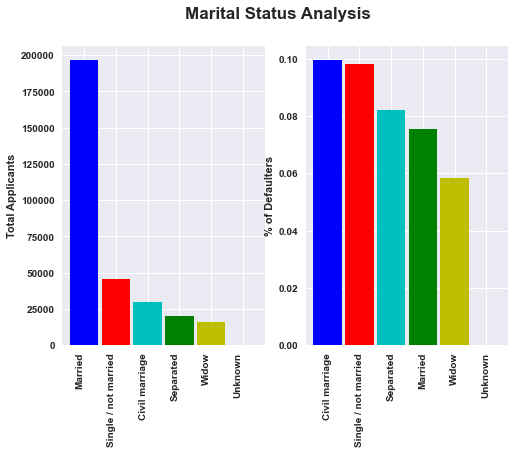

In [33]:
fig,(ax1,ax2) = plt.subplots(1,2)
plt.suptitle("Marital Status Analysis",fontweight = "bold",size = 17)
plt.rcParams["font.weight"]="bold"
plt.rcParams["axes.labelweight"] = "bold"
colors = list('brcgym')
df1.NAME_FAMILY_STATUS.value_counts().plot.bar(ax = ax1,color = colors,width = 0.9)
ax1.tick_params(axis = "x" , labeltop=False)
ax1.set_ylabel("Total Applicants")
for labels in ax1.get_xticklabels():
    labels.set_ha("right")
    labels.set_rotation(90)

df1.groupby("NAME_FAMILY_STATUS")["TARGET"].mean().sort_values(ascending
                                                               = False).plot.bar(ax=ax2,color = colors,
                                                                                width = 0.9)
ax2.tick_params(axis = "x",labeltop = False)
ax2.set_ylabel("% of Defaulters")
ax2.set(xlabel = None)
plt.show()

# Most applicants are married (approx 60%) and close to 7% of such applicants default on their 
# loan commitments.
# In proportion to their total applications in each category, civil marriage has the 
# highest default rate.




###### Age Distribution(at the time of application):

<AxesSubplot:xlabel='AGE', ylabel='TARGET'>

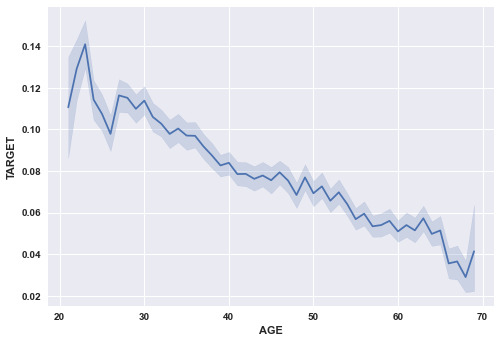

In [34]:
df1["AGE"] = df1["DAYS_BIRTH"].apply(lambda x:abs(round(x/365)))
sns.lineplot(x = df1["AGE"], y = "TARGET",data = df1)

#This shows that the rate of loan defualt for people in their early years is high and it keeps decreasing
#with time.

In [35]:
age = df1[["AGE","TARGET"]].groupby("AGE").mean().sort_values(by = "AGE",ascending = True)

###### Children count:

<Figure size 576x432 with 0 Axes>

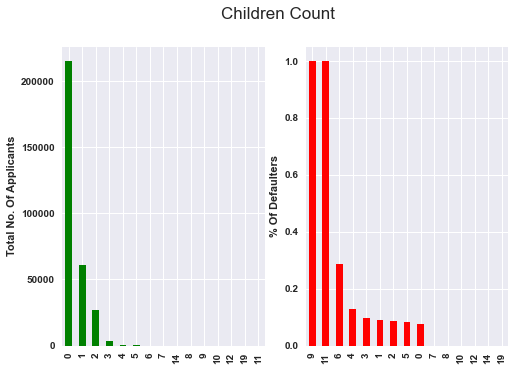

In [36]:
plt.figure(figsize= (8,6))
fig,(ax1,ax2) = plt.subplots(1,2)
plt.suptitle("Children Count",size = 17,ha = "center")

df1.CNT_CHILDREN.value_counts().sort_values(ascending = False).plot.bar(ax= ax1,color = "green")
ax1.tick_params(axis = "x",labeltop = False)
ax1.set_ylabel("Total No. Of Applicants")

df1[["CNT_CHILDREN","TARGET"]].groupby("CNT_CHILDREN").mean().sort_values(by="TARGET",ascending = False).plot.bar(ax=ax2,color= "red")
ax2.get_legend().remove()
ax2.tick_params(axis = "x",labeltop= False)
ax2.set(xlabel = None)
ax2.set_ylabel("% Of Defaulters")
plt.show()

#People with no children form the largest percentage of applicants.
#The data shows that people with 9 or 11 children will definitely not repay the loan.However it may be
#be noted that this is due to a lower sample of people with that many children and coincidentally
#none of such applicant has repaid the loan.
        

###### Family Members :-

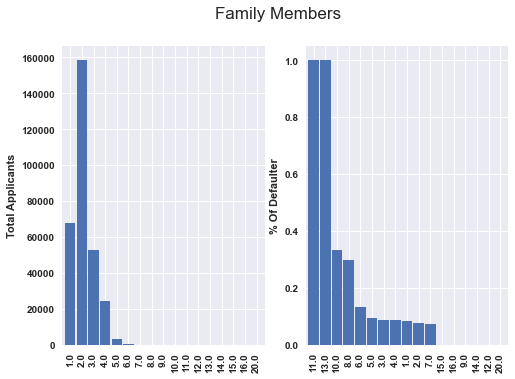

In [37]:
plt.suptitle("Family Members",size = 17,ha = "center")
ax1=plt.subplot(1,2,1)
df1[["CNT_FAM_MEMBERS","TARGET"]].groupby("CNT_FAM_MEMBERS").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["CNT_FAM_MEMBERS","TARGET"]].groupby("CNT_FAM_MEMBERS").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")
plt.show()

# Insights: Most number of applicants have a family member count of 5
#         Applicants with a member of count of 11 and 13 will not pay their loan. However, it must
#         be noted that the data is somewhat biased or has outliers which we will deal with a little later.
#         For now every applicant with 11 or 13 members willnot pay their loans. 2-4% of applicants with
#         famil member count between 8 to 10 will default on their payments.
            

###### Education Type:-

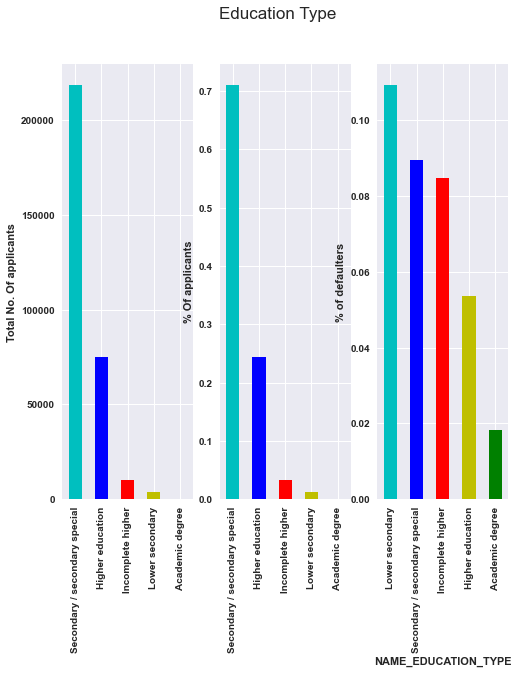

<Figure size 720x864 with 0 Axes>

In [38]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (8,8))
plt.suptitle("Education Type",size = 17)
plt.figure(figsize=(10,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"

df1.NAME_EDUCATION_TYPE.value_counts().sort_values(ascending = False).plot.bar(ax=ax1,
                                                              color = ["c","b","r","y","g"])
ax1.tick_params(axis = 'x',labeltop = False) 
ax1.set_ylabel("Total No. Of applicants")

df1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax2,color=["c","b","r","y","g"])
ax2.tick_params(axis = 'x',labeltop = False) 
ax2.set_ylabel("% Of applicants")

df1.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values(ascending = False).plot.bar(ax = ax3,color=["c","b","r","y","g"])
ax3.tick_params(axis = "x",labeltop=False)
ax3.set_ylabel("% of defaulters")
plt.show()

# Insight : most applicants have secondary/secondary special as their highest qualification
#             applicants with lower secondary as their highest education qualification tend to 
#             default more.
#             Basically, applicants who are less educated are more likely to miss out on their payments.
#             Almost 5% of applicants with higher education renege on their payment commitments.

##### Income Type ;-

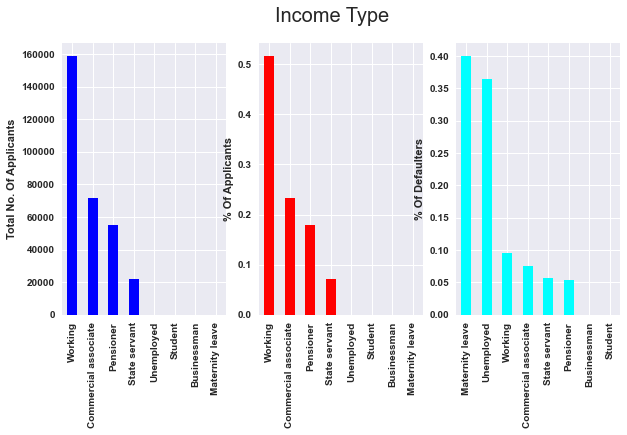

In [39]:
plt.rcParams["figure.figsize"]=(10,5)
plt.suptitle("Income Type",size = 20)
ax1 = plt.subplot(1,3,1)
ax2 = plt.subplot(1,3,2)
ax3 = plt.subplot(1,3,3)
fig1 =df1[["NAME_INCOME_TYPE","TARGET"]].groupby("NAME_INCOME_TYPE").count().sort_values(by = "TARGET",
                                                                                   ascending = False)
fig1.plot.bar(ax=ax1,color = ["b","b","g","y","c","m","b","g"])
ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel = None)
ax1.set_ylabel("Total No. Of Applicants")

fig3 = df1[["NAME_INCOME_TYPE","TARGET"]].groupby("NAME_INCOME_TYPE").mean().sort_values(by = "TARGET",
                                                                                        ascending = False)
fig3.plot.bar(ax=ax3,color = "cyan")
ax3.tick_params(axis = "x",labeltop = False)
ax3.get_legend().remove()
ax3.set(xlabel = None)
ax3.set_ylabel("% Of Defaulters")

fig2 = df1.NAME_INCOME_TYPE.value_counts(normalize = True)
fig2.plot.bar(ax=ax2,color = "red")
ax2.tick_params(axis = "x",labeltop = False)
ax2.set_ylabel("% Of Applicants")

plt.show()

# Insight: Applicants who are working professionals(60%) and commercial associates(23%) tend to apply
#         more for home loans.
#         Again since the data is a little biased, therefore applicants on maternity leave and unemployed 
#         people are more likely to default on their payments.
#         out of 60% of working professionals who apply for the loans almost 9% default on their payments.

In [40]:
df1.NAME_INCOME_TYPE.value_counts(normalize = True)

Working                 0.516320
Commercial associate    0.232892
Pensioner               0.180033
State servant           0.070576
Unemployed              0.000072
Student                 0.000059
Businessman             0.000033
Maternity leave         0.000016
Name: NAME_INCOME_TYPE, dtype: float64

###### Occupation Type:-

In [41]:
df1.OCCUPATION_TYPE.isnull().sum()   # The missing values are quite high. we will change it to 'Unknown'.

96391

In [42]:
df1["OCCUPATION_TYPE"].replace(np.nan,"Unknown",inplace =True)


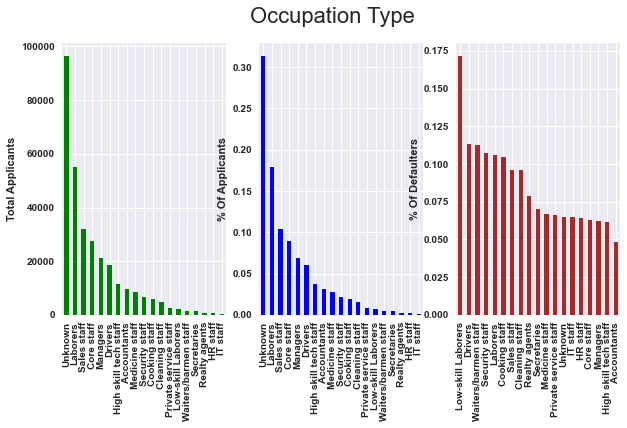

In [43]:
plt.suptitle("Occupation Type",size = 22,ha = "center")
plt.rcParams["figure.figsize"] = (12,6)
ax1 = plt.subplot(1,3,1)
df1.OCCUPATION_TYPE.value_counts().plot.bar(ax = ax1,color = "green")
ax1.set_ylabel("Total Applicants")
ax2 = plt.subplot(1,3,2)
df1.OCCUPATION_TYPE.value_counts(normalize = True).plot.bar(ax = ax2,color = 'blue')
ax2.set_ylabel("% Of Applicants")
ax3 = plt.subplot(1,3,3)
df1[["OCCUPATION_TYPE","TARGET"]].groupby("OCCUPATION_TYPE").mean().sort_values(by = "TARGET",ascending = False).plot.bar(ax = ax3,color = "brown")
ax3.get_legend().remove()
ax3.set(xlabel=None)
ax3.set_ylabel("% Of Defaulters")
plt.show()

# Insight: Applicants are usually reluctant in sharing their occupation information.
#         From whatever info we have it seems that Laborers and sales staff are more likely to apply
#         for a home loan.
#         Low skilled laborers tend to default more on their payment commitments (almost 17%) followed
#         by watiers in proportion to their total applications.
#         Almost 11% of laborers who apply for loans default on their payment commitments.

###### Organisation Type :-

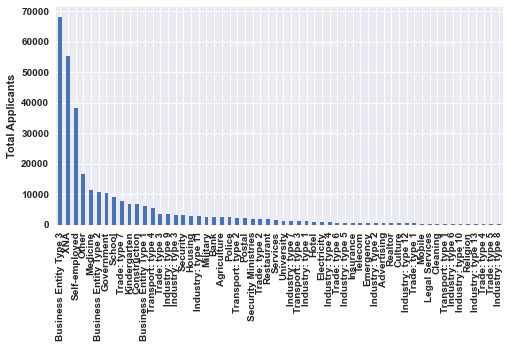

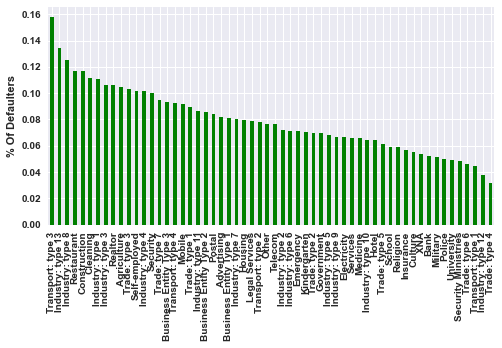

In [44]:
plt.rcParams["figure.figsize"] = (8,4)
df1.ORGANIZATION_TYPE.value_counts().plot.bar()
plt.ylabel("Total Applicants")


fig = df1[["ORGANIZATION_TYPE","TARGET"]].groupby("ORGANIZATION_TYPE").mean()
ax = fig.sort_values(by = "TARGET",ascending = False).plot.bar(color = "green")
ax.set(xlabel = None)
ax.set_ylabel("% Of Defaulters")
ax.get_legend().remove()

plt.show()

# Insight : Applicants with transport:type3 in their organisation category are more likely to default 
#         on their payments.
# Business entity type 3 forms the largest share of applicants and their default rate is almost 10%.

#### Demographic Analysis:

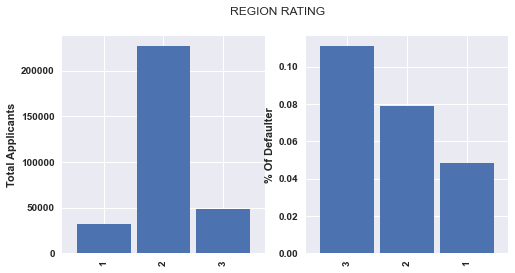

In [45]:
plt.suptitle("REGION RATING")
ax1=plt.subplot(1,2,1)
df1[["REGION_RATING_CLIENT","TARGET"]].groupby("REGION_RATING_CLIENT").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["REGION_RATING_CLIENT","TARGET"]].groupby("REGION_RATING_CLIENT").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")
plt.show()

# INSIGHT  : Major application comes from region with rating 2 and maximum default rate is for applicants
#     belonging to region with rating 3.


###### REG_REGION_NOT_LIVE_REGION

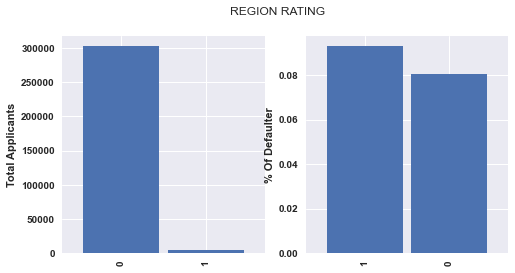

In [46]:
plt.suptitle("REGION RATING")
ax1=plt.subplot(1,2,1)
df1[["REG_REGION_NOT_LIVE_REGION","TARGET"]].groupby("REG_REGION_NOT_LIVE_REGION").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["REG_REGION_NOT_LIVE_REGION","TARGET"]].groupby("REG_REGION_NOT_LIVE_REGION").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")

plt.show()

# Insight : Most applicants contact address is same as permanent address.
#     Quite understandably, the people defaulting on their commitments with contact and permanent address
#     being different are more(9%).

###### REG_REGION_NOT_WORK_REGION:

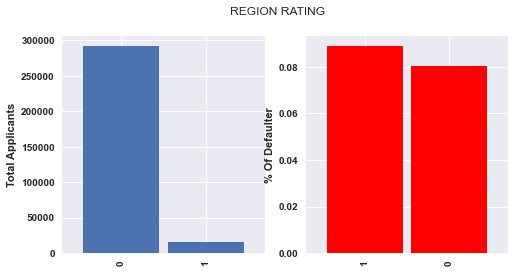

In [47]:
plt.suptitle("REGION RATING")
ax1=plt.subplot(1,2,1)
df1[["REG_REGION_NOT_WORK_REGION","TARGET"]].groupby("REG_REGION_NOT_WORK_REGION").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["REG_REGION_NOT_WORK_REGION","TARGET"]].groupby("REG_REGION_NOT_WORK_REGION").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",
                                                                                                color = ["red","blue"],ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")
plt.show()

# Insight : Most applicants work address is same as permanent address.
#   Applicants defaulting in both the categories are almost identical.

##### REG_CITY_NOT_LIVE_CITY

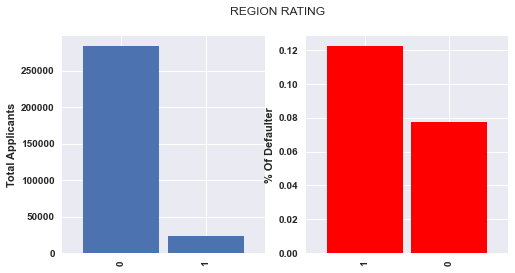

In [48]:
plt.suptitle("REGION RATING")
ax1=plt.subplot(1,2,1)
df1[["REG_CITY_NOT_LIVE_CITY","TARGET"]].groupby("REG_CITY_NOT_LIVE_CITY").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["REG_CITY_NOT_LIVE_CITY","TARGET"]].groupby("REG_CITY_NOT_LIVE_CITY").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",
                                                                                                color = ["red","blue"],ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")
plt.show()

# Insight  : most applicants have city in their contact address matching with city in permanent address.
#     most defaulting applicants have their cities mismatched in contact address and permanent address.

###### REG_CITY_NOT_WORK_CITY:

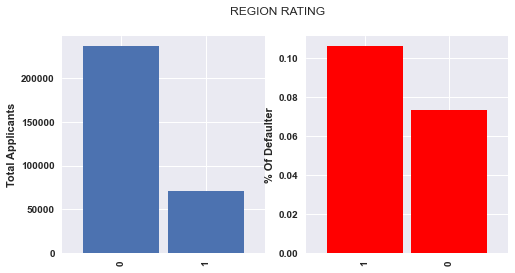

In [49]:
plt.suptitle("REGION RATING")
ax1=plt.subplot(1,2,1)
df1[["REG_CITY_NOT_WORK_CITY","TARGET"]].groupby("REG_CITY_NOT_WORK_CITY").count().plot(kind="bar",ax = ax1,width=0.9)

ax1.get_legend().remove()
ax1.tick_params(axis = "x",labeltop = False)
ax1.set(xlabel= None)
ax1.set_ylabel("Total Applicants")


ax2 = plt.subplot(1,2,2)
df1[["REG_CITY_NOT_WORK_CITY","TARGET"]].groupby("REG_CITY_NOT_WORK_CITY").mean().sort_values(by = "TARGET",
                                                                        ascending = False).plot(kind="bar",
                                                                                                color = ["red","blue"],ax = ax2, width = 0.9)
ax2.get_legend().remove()
ax2.set(xlabel=None)
ax2.tick_params(axis = "x",labeltop = False) 
ax2.set_ylabel("% Of Defaulter")
plt.show()

# Insight :  most applicants have city in their work address matching with city in permanent address.
#     most defaulting applicants have their cities mismatched in work address and permanent address.

###### Application Day : - 

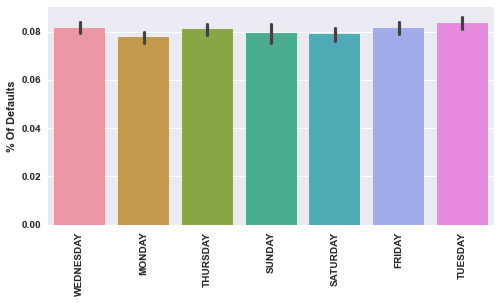

In [50]:
ax = sns.barplot(x = "WEEKDAY_APPR_PROCESS_START" , y = "TARGET" , data = df1)
ax.set_xticklabels(labels = df1["WEEKDAY_APPR_PROCESS_START"].unique(),rotation = 90)
ax.set(xlabel = None,ylabel = "% Of Defaults")
plt.show()


## INCOME ANALYSIS(NUM_NUM ANALYSIS):

###### Income Distribution on unfiltered dataframe and filtered dataframe:-

C:\Users\Vishal Kumar Rai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

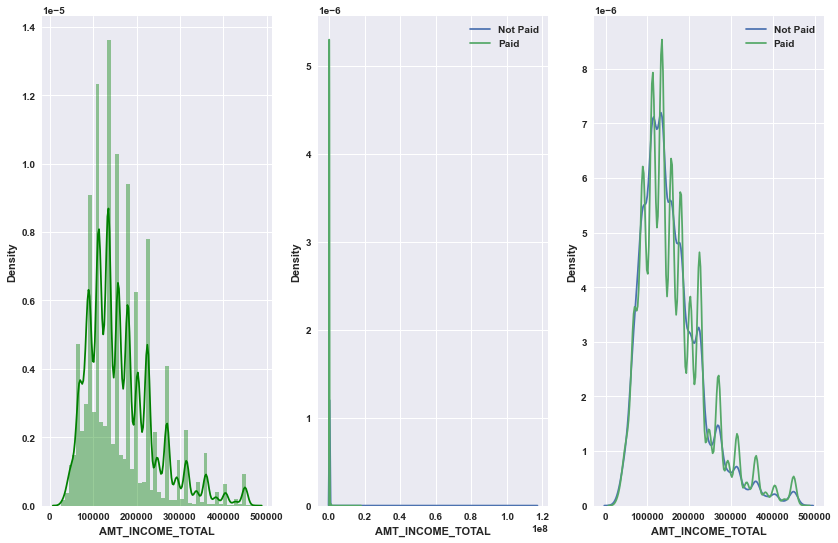

In [51]:

income_filtered = df1[df1["AMT_INCOME_TOTAL"]<472500]
#This is where we are trying to cap the income at 99th percentile due to presence of extreme values
# in the income column which was skewing the data.

fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (14,9))
sns.distplot(income_filtered["AMT_INCOME_TOTAL"],ax = ax1,color = "green" , kde = True)


temp1 = df1.loc[df1["TARGET"] == 1]   # dataframe df1 has been split on the basis of Target Values
                                     # 1 and 0 with all values intact.
temp0 = df1.loc[df1["TARGET"] == 0]

sns.kdeplot(data = temp1 , x = "AMT_INCOME_TOTAL" ,ax = ax2, label = "Not Paid")
sns.kdeplot(data = temp0 , x = "AMT_INCOME_TOTAL",ax = ax2, label = "Paid")
ax2.legend(labels = ["Not Paid", "Paid"])
income_filtered_temp1 = income_filtered.loc[income_filtered["TARGET"]==1] # this dataframe has its income 
income_filtered_temp0 = income_filtered.loc[income_filtered["TARGET"]==0] #column capped and then split into two
                                                                          #based on Target Variable.
sns.kdeplot(data = income_filtered_temp1 , x = "AMT_INCOME_TOTAL" ,ax = ax3, label = "Not Paid")
sns.kdeplot(data = income_filtered_temp0 , x = "AMT_INCOME_TOTAL",ax = ax3, label = "Paid")

plt.legend()
plt.show

# The plots reveals the distribution of total income before and after fixing the outliers.

###### How is income distributed within different age groups and target category :-

<Figure size 576x288 with 0 Axes>

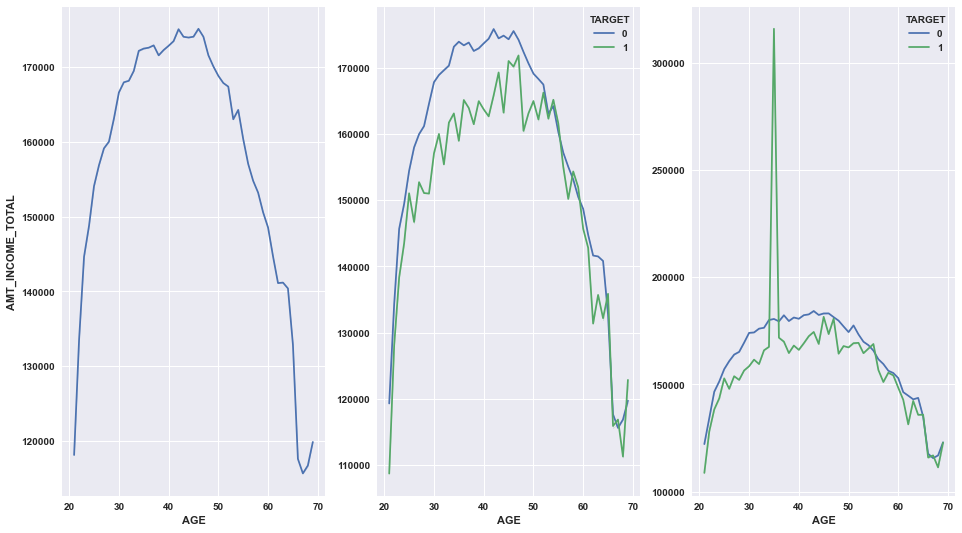

In [52]:
plt.suptitle("Income-Age Distribution",size = 17)
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,9))
sns.lineplot(x = income_filtered["AGE"],y = "AMT_INCOME_TOTAL",ax = ax1,data = df1 , estimator = np.mean,
            markers = True,ci = False)

sns.lineplot(x = income_filtered["AGE"],y = "AMT_INCOME_TOTAL",ax = ax2,hue = "TARGET",data = df1 , estimator = np.mean,
            markers = True,ci = False)
ax2.set(ylabel = None)

sns.lineplot(x = df1["AGE"],y = "AMT_INCOME_TOTAL",ax = ax3,hue = "TARGET",data = df1 , estimator = np.mean,
            markers = True,ci = False)
ax3.set(ylabel = None)

plt.show()

# Insight : As age rises, the total income rises and after reaching mid 40s it starts to decline
#         again.
#         income of applicants in the age group 40-50 who have paid the loan is higher than those 
#         who have defaulted barring a few exceptions.
#         people in the age group 40-50 generally have higher income and their default rate is also low.

###### How is income distrbuted against the target variable:-

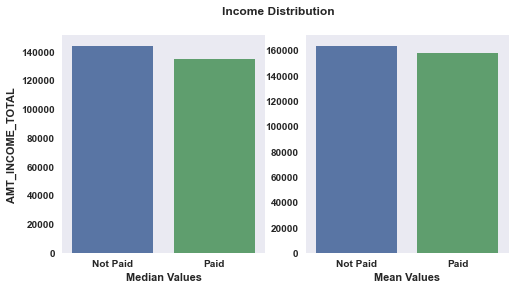

In [53]:
plt.style.use("seaborn-dark")
plt.suptitle("Income Distribution",fontweight = "bold")
ax1 = plt.subplot(1,2,1)
sns.barplot(x = "TARGET" , y="AMT_INCOME_TOTAL" , data = income_filtered ,ax = ax1,estimator = np.median)
ax1.set_xticklabels(labels = ["Not Paid", "Paid"])
ax1.set(xlabel = "Median Values")
ax2 = plt.subplot(1,2,2)
sns.barplot(x = "TARGET" , y = "AMT_INCOME_TOTAL" , data = income_filtered , ax = ax2 , estimator = np.mean,ci = False)
ax2.set_xticklabels(labels = ["Not Paid", "Paid"])
ax2.set(xlabel= "Mean Values" , ylabel = None)
plt.show()

# Insight : Applicants who default on their loan payments generally have a higher income as compared to
#     those who have paid the loans

# We can mention the difference in averages for the dataset that is filtered and not filtered is insignificant.
# Therefore, the outliers do not skew the analysis too much.

###### How is income distributed against different education types;-

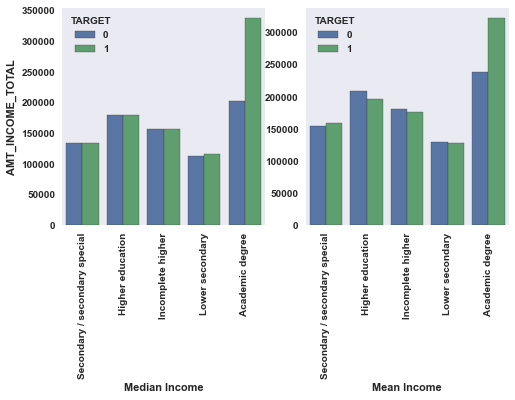

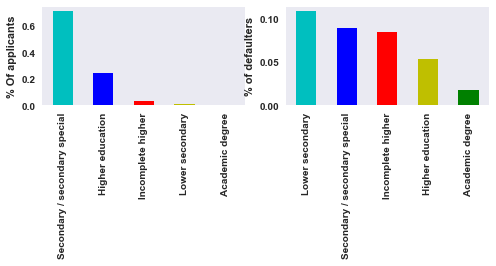

In [54]:
ax1=plt.subplot(1,2,1)
sns.barplot(x= df1["NAME_EDUCATION_TYPE"],y = "AMT_INCOME_TOTAL",ax = ax1,
                 data = df1,estimator = np.median,hue = "TARGET",ci = False,edgecolor = "0.2")
ax1.set_xticklabels(df1["NAME_EDUCATION_TYPE"].unique(),rotation = 90)
ax1.set(xlabel="Median Income")
ax2 = plt.subplot(1,2,2)
sns.barplot(x = df1["NAME_EDUCATION_TYPE"], y = "AMT_INCOME_TOTAL",ax = ax2,
           data = df1 , estimator = np.mean,hue= "TARGET",ci = False,edgecolor = "0.2")
ax2.set_xticklabels(df1["NAME_EDUCATION_TYPE"].value_counts().index,rotation = 90)
ax2.set(ylabel = None,xlabel = "Mean Income")
plt.show()

ax3 = plt.subplot(2,2,1)
df1.NAME_EDUCATION_TYPE.value_counts(normalize = True).plot.bar(ax=ax3,color=["c","b","r","y","g"])
ax3.tick_params(axis = 'x',labeltop = False) 
ax3.set_ylabel("% Of applicants")

ax4 = plt.subplot(2,2,2)
df1.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values(ascending = False).plot.bar(ax = ax4,color=["c","b","r","y","g"])
ax4.tick_params(axis = "x",labeltop=False)
ax4.set(ylabel = "% of defaulters",xlabel = None)

plt.show()
# This plot shows the mean and median income of all the applicants grouped as per their education 
# level who have either paid or not paid the loan.

# Insight : As expected,applicants with lower educational qualification tend to earn lower annual income
# and their default rate is the maximum.
# Median income of all educational qualifications except lower and academic degree holders is same for
# those who have repaid and those who haven't paid the loan installments.
# mean income of all educational qualifications except secondary/secondary special and academic degree
# holder is same for both the categories(paid/not paid).

###### How is income distributed against various marital statuses:

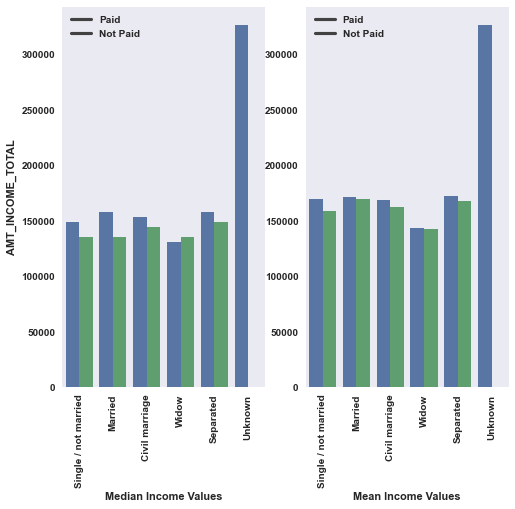

In [55]:
plt.rcParams["figure.figsize"] = (8,7)
ax1= plt.subplot(1,2,1)
sns.barplot(x= df1["NAME_FAMILY_STATUS"],y = "AMT_INCOME_TOTAL",
            data = df1,ax = ax1,hue = "TARGET",estimator = np.median,ci = False)
ax1.set_xticklabels(labels = df1["NAME_FAMILY_STATUS"].unique(),rotation = 90)
ax1.set_xlabel("Median Income Values")
ax1.legend(labels = ["Paid","Not Paid"])
ax2 = plt.subplot(1,2,2)
sns.barplot(x = df1["NAME_FAMILY_STATUS"], y = "AMT_INCOME_TOTAL",data = df1,ax=ax2,
            hue = "TARGET",estimator = np.mean,ci = False)
ax2.set_xticklabels(labels = df1["NAME_FAMILY_STATUS"].unique(),rotation = 90)
ax2.set_xlabel("Mean Income Values")
ax2.set(ylabel = None)
ax2.legend(labels = ["Paid","Not Paid"])
plt.show()

# Median income of most applicants with different marital statuses are higher for 
# those who have defaulted except for widow category.
# Mean income of most applicants with different marital statuses are higher for 
# those who have defaulted except for widow category.

###### Relationship between employment duration and loan default:

In [56]:
df1["Emp_Tenure"] = df1["DAYS_EMPLOYED"].apply(lambda x:abs(round(x/365)))
# sns.lineplot(x = df1["Emp_Tenure"], y = "TARGET",data = df1,estimator = np.mean)

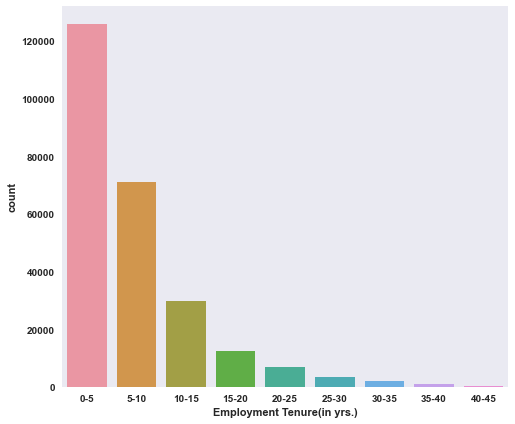

In [57]:
emp_filtered = df1[df1["DAYS_EMPLOYED"]!= 365243]
emp_filtered_temp1 = emp_filtered.loc[emp_filtered["TARGET"] ==1]
emp_filtered_temp0 = emp_filtered.loc[emp_filtered["TARGET"]==0]
df1['Emp_Tenure_bins'] = pd.cut(x=df1['Emp_Tenure'], bins=np.arange(0,50,5),include_lowest = True,
                               right = False , labels = ["0-5","5-10","10-15","15-20","20-25",
                                                        "25-30","30-35","35-40","40-45"])
ax = sns.countplot(x = "Emp_Tenure_bins",data = df1)
ax.set(xlabel = "Employment Tenure(in yrs.)")
plt.show()

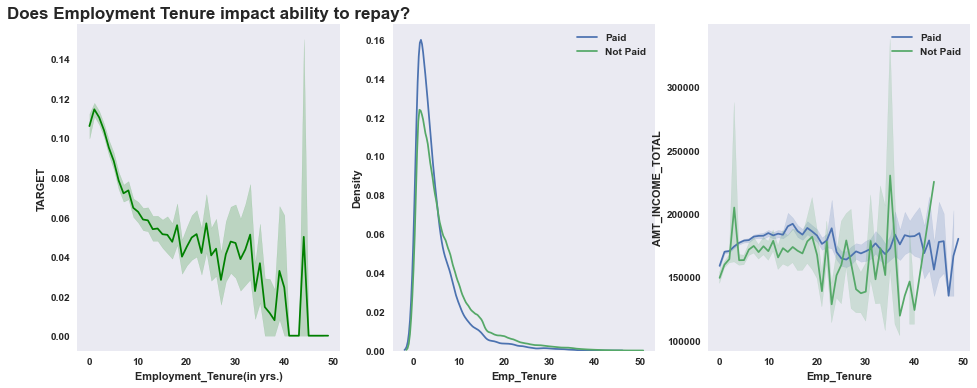

In [58]:
df1["Emp_Tenure"].unique()
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (16,6))
df1.loc[(df1["Emp_Tenure"]==1001),"Emp_Tenure"] = np.nan
sns.lineplot(x = df1["Emp_Tenure"], y = "TARGET",data = df1,estimator = np.mean,ax= ax1,color = "green")
ax1.set_title("Does Employment Tenure impact ability to repay?",fontweight = "bold",size = 17)
ax1.set(xlabel = "Employment_Tenure(in yrs.)")

sns.kdeplot(x= "Emp_Tenure", data = emp_filtered_temp1 , ax = ax2)
sns.kdeplot(x = "Emp_Tenure" , data  = emp_filtered_temp0, ax = ax2)

sns.lineplot(x = "Emp_Tenure", y = "AMT_INCOME_TOTAL", hue = "TARGET",
             data = emp_filtered , ax = ax3 )
ax2.legend(labels = ["Paid","Not Paid"])
plt.legend(labels = ["Paid","Not Paid"])
plt.savefig("employment_income_distribution.png")
plt.show()



#The default rate for people who have an employment tenure between 0 and 10 years
#is high and we can see it reduces as employment tenure increase.
# The second plot shows the density of both defaulters and non-defaultes in terms of their employment tenure.
# The third plot is a distribution of total income for both defaulters and non defaulters across different
#employment tenures.



## Distribution Charts:

###### AMT_ANNUITY , AMT_CREDIT and AMT_GOODS_PRICE :-

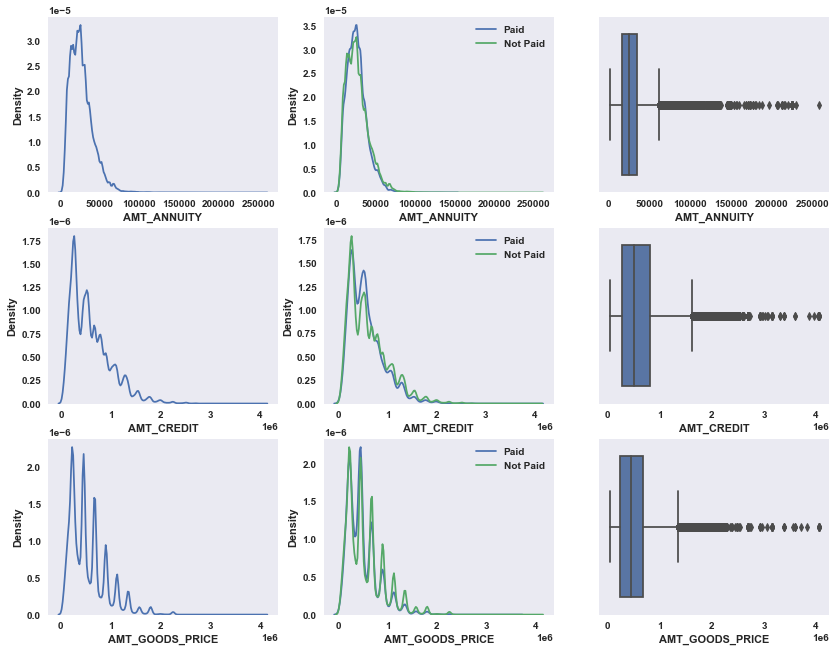

In [59]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(3,3,figsize = (14,11))
sns.kdeplot(data = df1,x = "AMT_ANNUITY",ax = ax1)
ax1.set(xlabel = "AMT_ANNUITY")


sns.kdeplot(data = temp1,x = "AMT_ANNUITY",label = "NOT PAID",ax = ax2)
sns.kdeplot(data = temp0 , x = "AMT_ANNUITY",label ="PAID",ax =ax2)
ax2.set(xlabel = "AMT_ANNUITY")
ax2.legend(labels=["Paid","Not Paid"])

sns.boxplot(x = "AMT_ANNUITY" , data  =df1 , ax = ax3)


sns.kdeplot(data = df1,x = "AMT_CREDIT",ax = ax4)



sns.kdeplot(data = temp1,x = "AMT_CREDIT",label = "NOT PAID",ax = ax5)
sns.kdeplot(data = temp0 ,x = "AMT_CREDIT",label ="PAID",ax =ax5)
ax5.legend(labels=["Paid","Not Paid"])

sns.boxplot(x = "AMT_CREDIT" , data  =df1 , ax = ax6)

sns.kdeplot(data = df1,x = "AMT_GOODS_PRICE",ax = ax7)

sns.kdeplot(data = temp1,x = "AMT_GOODS_PRICE",label = "NOT PAID",ax = ax8)
sns.kdeplot(data = temp0 ,x = "AMT_GOODS_PRICE",label ="PAID",ax =ax8)
ax8.legend(labels=["Paid","Not Paid"])

sns.boxplot(x = "AMT_GOODS_PRICE" , data  = df1 , ax = ax9)
plt.show()


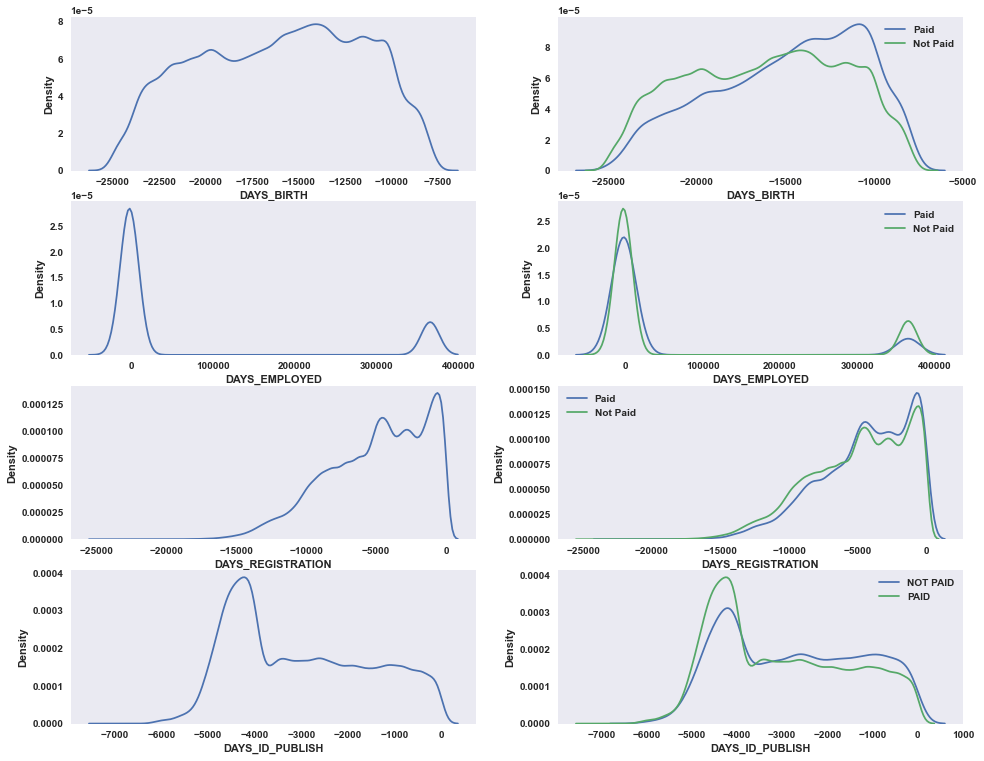

In [60]:
fig,((ax1,ax2),(ax3,ax4),(ax5,ax6),(ax7,ax8)) = plt.subplots(4,2,figsize = (16,13))
sns.kdeplot(data = df1,x = "DAYS_BIRTH",ax = ax1)
ax1.set(xlabel = "DAYS_BIRTH")


sns.kdeplot(data = temp1,x = "DAYS_BIRTH",label = "NOT PAID",ax = ax2)
sns.kdeplot(data = temp0 , x = "DAYS_BIRTH",label ="PAID",ax =ax2)
ax2.set(xlabel = "DAYS_BIRTH")
ax2.legend(labels=["Paid","Not Paid"])
sns.kdeplot(data = df1,x = "DAYS_EMPLOYED",ax = ax3)



sns.kdeplot(data = temp1,x = "DAYS_EMPLOYED",label = "NOT PAID",ax = ax4)
sns.kdeplot(data = temp0 ,x = "DAYS_EMPLOYED",label ="PAID",ax =ax4)
ax4.legend(labels=["Paid","Not Paid"])
sns.kdeplot(data = df1,x = "DAYS_REGISTRATION",ax = ax5)

sns.kdeplot(data = temp1,x = "DAYS_REGISTRATION",label = "NOT PAID",ax = ax6)
sns.kdeplot(data = temp0 ,x = "DAYS_REGISTRATION",label ="PAID",ax =ax6)
ax6.legend(labels=["Paid","Not Paid"])
sns.kdeplot(data = df1,x = "DAYS_ID_PUBLISH",ax = ax7)

sns.kdeplot(data = temp1,x = "DAYS_ID_PUBLISH",label = "NOT PAID",ax = ax8)
sns.kdeplot(data = temp0 ,x = "DAYS_ID_PUBLISH",label ="PAID",ax =ax8)
ax8.legend(labels=["Paid","Not Paid"])
plt.legend()
plt.savefig("DAYS_Distribution.png")     
plt.show()


###### correlation between Numeric variables:

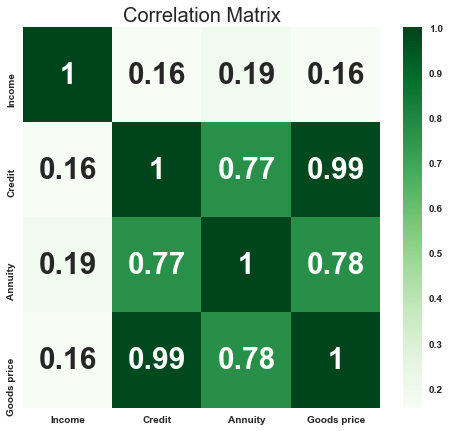

In [61]:
corr = df1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]].corr()
columns = ["Income","Credit","Annuity","Goods price"]
ax = sns.heatmap(corr,annot= True,annot_kws = {"size":30},xticklabels = columns,yticklabels = columns,cmap = "Greens")
ax.set_title("Correlation Matrix",size=20,ha = "center")
plt.show()
# Insight : There is a very high correlation between amt_credit and amt_goods_price,
#     am_credit and amt_annuity, amt_annuity and amt_goods_price.
#     Total income has very low positive correlation between all other variables.

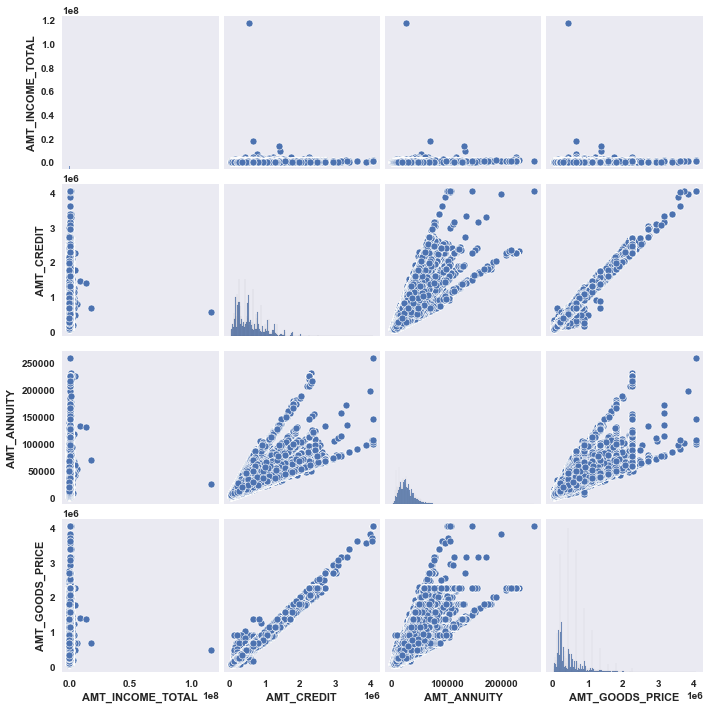

In [62]:
sns.pairplot(df1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]],data = df1)
plt.show()